In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D





In [13]:
file_path = './FMCW Radar/Rawdata/Rawdata_1.csv'
def readCsv(pathFile):
    arrays = []

    with open(pathFile, 'r') as file:
        # Read the lines of the file
        lines = file.readlines()
        for line in lines:
            line_values = line.strip().split(',')
            arrays.append(line_values)
    complex_array = []
    for array in arrays:

        complex_value = np.array(
            [complex(element.replace('i', 'j')) for element in array])
        complex_array.append(complex_value)
    np.array(complex_array)
    return np.array(complex_array)
raw_data = readCsv(file_path)
raw_data_channel_0 = raw_data[0]

In [14]:
NUM_SAMPLE_CHIRP = 256
print(len(raw_data_channel_0))
chirps = [raw_data_channel_0[i:i+NUM_SAMPLE_CHIRP*2] for i in range(0, len(raw_data_channel_0), NUM_SAMPLE_CHIRP*2)]
first_chirps_of_frame = [chirps[j] for j in range(0, len(chirps), 1)]
print(np.array(first_chirps_of_frame).shape)

3072000
(6000, 512)


In [1]:
def genetate3DSpectrum(the2DPlottingSignal):
    signals = the2DPlottingSignal
    num_signals =np.array(signals).shape[0]

    # Compute FFT for each signal in the array
    fft_results = np.fft.fft(signals, axis=1)
    n = np.array(signals).shape[1]
    frequencies = np.fft.fftfreq(n)

    # Create grid for 3D plotting
    x = np.arange(num_signals)
    y = frequencies[:n//2]
    x, y = np.meshgrid(x, y)

    # Magnitude of the FFT components for the first half of the frequencies
    fft_magnitude = np.abs(fft_results[:, :n//2])
    
    # Plotting
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D surface
    ax.plot_surface(x, y, fft_magnitude.T, cmap='viridis')

    ax.set_title('3D Magnitude Spectrum')
    ax.set_xlabel('Signal Index')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Magnitude')
    # ax.set_xticks(np.arange(num_signals))
    # ax.set_yticks(np.arange(min(y), max(y)+1, 20))  # Adjust y-axis ticks based on frequency range
    ax.invert_xaxis()  # Invert x-axis for better visualization

    plt.show()

In [2]:
genetate3DSpectrum(first_chirps_of_frame)

NameError: name 'first_chirps_of_frame' is not defined

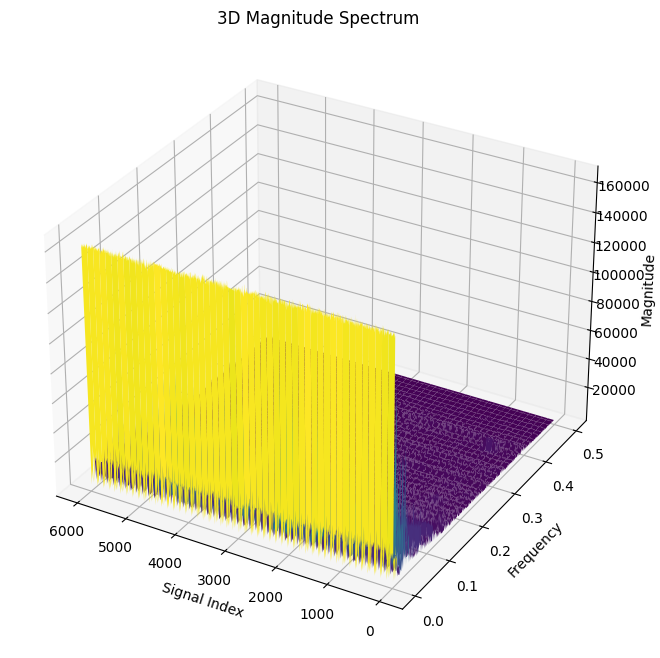

In [ ]:

# Generate sample data (an array of signals)
# Replace this with your own array of signals, each with the same length

signals = first_chirps_of_frame
num_signals =np.array(first_chirps_of_frame).shape[0]

# Compute FFT for each signal in the array
fft_results = np.fft.fft(signals, axis=1)
n = np.array(first_chirps_of_frame).shape[1]
frequencies = np.fft.fftfreq(n)

# Create grid for 3D plotting
x = np.arange(num_signals)
y = frequencies[:n//2]
x, y = np.meshgrid(x, y)

# Magnitude of the FFT components for the first half of the frequencies
fft_magnitude = np.abs(fft_results[:, :n//2])

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
%matplotlib notebook
# Plot the 3D surface
ax.plot_surface(x, y, fft_magnitude.T, cmap='viridis')

ax.set_title('3D Magnitude Spectrum')
ax.set_xlabel('Signal Index')
ax.set_ylabel('Frequency')
ax.set_zlabel('Magnitude')
# ax.set_xticks(np.arange(num_signals))
# ax.set_yticks(np.arange(min(y), max(y)+1, 20))  # Adjust y-axis ticks based on frequency range
ax.invert_xaxis()  # Invert x-axis for better visualization

plt.show()